In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.render import renderer
from lib.render.renderer import *
import numpy as np
from lib.models.deepsdf import DeepSDFOptimizer
import torch

ckpt_path = (
    "/home/korth/sketch2shape/logs/train/runs/2023-12-26_17-52-47/checkpoints/last.ckpt"
)

/home/borth/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
ref_light = ReflectionProperty(
    ambient=torch.tensor([1, 1, 1]),
    diffuse=torch.tensor([1, 1, 1]),
    specular=torch.tensor([1, 1, 1]),
)
lightsrc = LightSource(torch.tensor([0, 3, -3]), ref_light)

ref_obj = ReflectionProperty(
    ambient=torch.tensor([0.2, 0.2, 0.2]),
    diffuse=torch.tensor([0.5, 0.5, 0.5]),
    specular=torch.tensor([0.2, 0.2, 0.2]),
)

model = DeepSDFOptimizer(
    ckpt_path,
    optim=None,
    loss=None,
    prior_idx=37,
    save_obj=True,
    save_obj_path="/home/korth/sketch2shape/temp/",
)
model._init_latent()
camera = renderer.Renderer(width=256, height=256, focal=512, lightsource=lightsrc)

/home/borth/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.


/home/borth/miniconda3/envs/pytorch3d/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


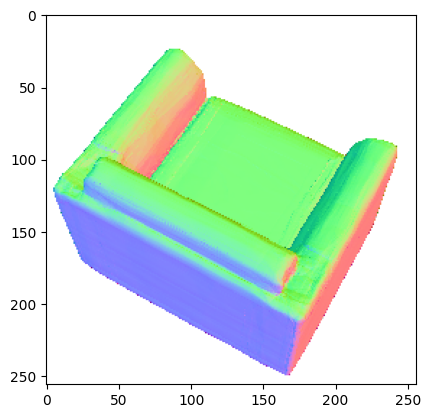

In [4]:
pose = renderer.get_camera_to_world(azim=150, elev=-60, dist=4)
camera.render_normal(model, pose, device="cuda")
camera.show_normal()

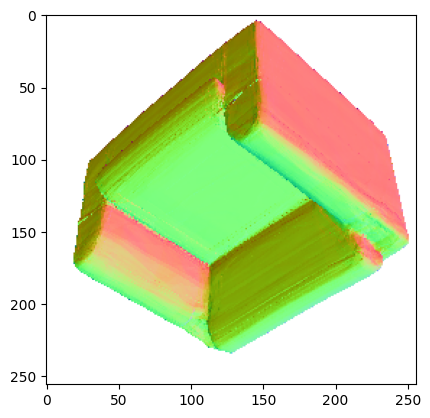

In [220]:
camera.show_normal()

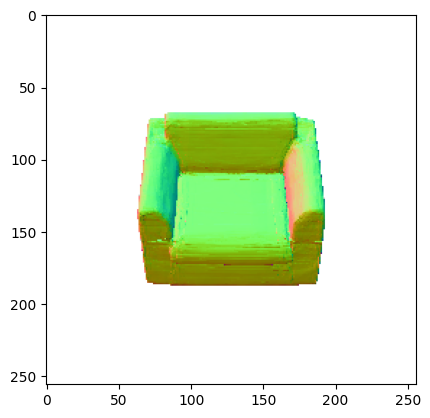

In [56]:
camera.show_normal()

In [9]:
camera.save_normal("/home/korth/sketch2shape/temp/normal.png")

In [5]:
normal = camera.normal

In [6]:
x = (((normal + 1) / 2) * 255).numpy().astype("uint8")

In [10]:
import cv2

In [12]:
cv2.imwrite("/home/korth/sketch2shape/temp/cv2.png", x)

True

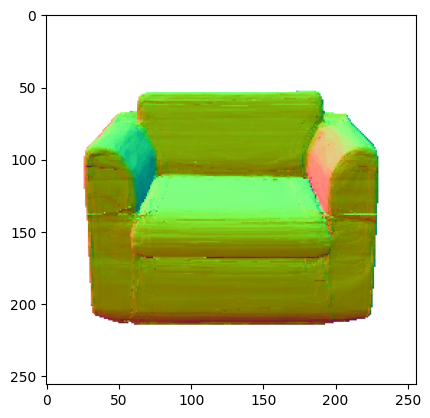

In [7]:
plt.imshow(x)

# Generate some Normalmap training data

In [5]:
ref_light = ReflectionProperty(
    ambient=torch.tensor([1, 1, 1]),
    diffuse=torch.tensor([1, 1, 1]),
    specular=torch.tensor([1, 1, 1]),
)
lightsrc = LightSource(torch.tensor([0, 3, -3]), ref_light)

ref_obj = ReflectionProperty(
    ambient=torch.tensor([0.2, 0.2, 0.2]),
    diffuse=torch.tensor([0.5, 0.5, 0.5]),
    specular=torch.tensor([0.2, 0.2, 0.2]),
)

model = DeepSDFOptimizer(
    ckpt_path,
    optim=None,
    loss=None,
    prior_idx=37,
    save_obj=True,
    save_obj_path="/home/korth/sketch2shape/temp/",
)
model._init_latent()
camera = renderer.Renderer(width=256, height=256, focal=512, lightsource=lightsrc)
pose = renderer.get_camera_to_world(0, 75, 4)

In [6]:
camera = renderer.Renderer(width=256, height=256, focal=512)

In [7]:
renderer.get_camera_to_world(0, 45, 4)

tensor([[ 1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  7.0711e-01,  7.0711e-01, -2.8284e+00],
        [-0.0000e+00, -7.0711e-01,  7.0711e-01, -2.8284e+00],
        [ 0.0000e+00,  6.3440e-09,  8.5571e-09,  1.0000e+00]])

In [8]:
np.arange(0, 361, 30, dtype=int)

array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360])

In [9]:
np.arange(45, 91, 15, dtype=int)

array([45, 60, 75, 90])

In [12]:
for theta in torch.arange(0, 360, 30):
    for phi in torch.arange(-45, -91, -15):
        pose = renderer.get_camera_to_world(theta, phi, 4)
        camera.render_normal(model, pose, "cuda")
        camera.save_normal(
            f"/home/borth/sketch2shape/temp/data/{theta}-{-phi}-{4}-normal.png"
        )
    break

/home/borth/sketch2shape/lib/render/renderer.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  deg = torch.deg2rad(torch.tensor(deg))
/home/borth/sketch2shape/lib/render/renderer.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  deg = torch.deg2rad(torch.tensor(deg))


In [39]:
img = plt.imread("/home/korth/sketch2shape/temp/data_overfit/0--45-4-normal.png")

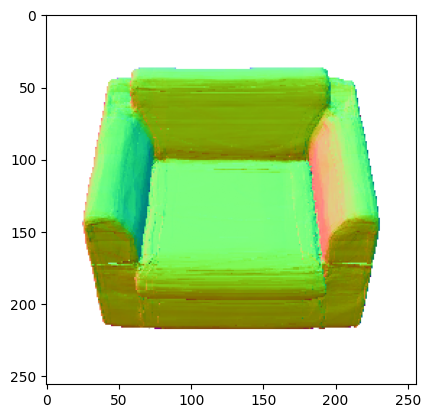

In [41]:
plt.imshow(img)